# DS-2B

In [17]:
import pandas as pd
import sklearn
import numpy as np
from matplotlib import pyplot as plt

## Import sets

In [18]:
train_data = pd.read_csv("./train_data_success.csv")
test_data = pd.read_csv('./test_data_success.csv')

In [19]:
train_data.head()
test_data.head()

,Unnamed: 0,age,interest,success
0,233,17.0,48.008462,1
1,25,34.0,65.962276,1
2,15,18.0,60.797971,1
3,227,23.0,40.614027,0
4,215,16.0,25.504759,0


In [20]:
success_features_train = train_data.iloc[:,[1,2]]
success_label_train = train_data["success"]

success_features_test = test_data.iloc[:,[1,2]]
success_label_test = test_data["success"]

## KNN classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [22]:
neigh = KNeighborsClassifier(metric="euclidean",)
neigh.fit(success_features_train, success_label_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
prediction_test = neigh.predict(success_features_test)
prediction_test[:]

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [24]:
cm = metrics.confusion_matrix(success_label_test, prediction_test)
print(cm)
# TODO: Use autotable.py from PetintLib

[[38  8]
 [ 2 42]]


In [25]:
print("Precision:,", metrics.precision_score(success_label_test, prediction_test))
print("Accuracy:,", metrics.accuracy_score(success_label_test, prediction_test))
print("Recall:,", metrics.recall_score(success_label_test, prediction_test))

Precision:, 0.84
Accuracy:, 0.8888888888888888
Recall:, 0.9545454545454546


(0.0, 1.0)

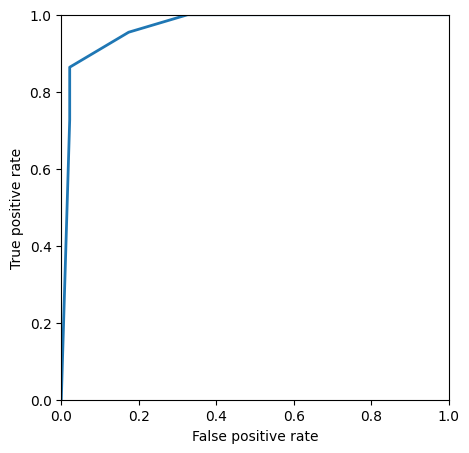

In [28]:
knn_prob = neigh.predict_proba(success_features_test)
fpr, tpr, theresholds = metrics.roc_curve(success_label_test, knn_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, linewidth=2.0)

y = x = np.linspace(1, 1, 100)
plt.plot(x, y, label='Random classifier')
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
